In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Suppress warnings from pandas library

import nltk
pathname = "/Users/Corey/Google Drive/Corey - School/Spring 2018 A/BIA 6304 - Text Mining/HW_Final/" #where to get/put files
pd.set_option('display.max_colwidth', 150000) #important for getting all the text

In [2]:
instagramdf = pd.read_csv(pathname + "Instagramtext.csv", index_col = "index") 

In [3]:
instagramtext = instagramdf["text"].astype(str).values.tolist()
se = pd.Series(instagramtext)
instagramdf['text'] = se.values

In [4]:
#Removing emojis
import re
try:
    # UCS-4
    highpoints = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
except re.error:
    # UCS-2
    highpoints = re.compile(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')

#This Removes all hashtags    
decode_text = re.compile(u'(?<!&)#(\w|(?:[\xA9\xAE\u203C\u2049\u2122\u2139\u2194-\u2199\u21A9\u21AA\u231A\u231B\u2328\u2388\u23CF\u23E9-\u23F3\u23F8-\u23FA\u24C2\u25AA\u25AB\u25B6\u25C0\u25FB-\u25FE\u2600-\u2604\u260E\u2611\u2614\u2615\u2618\u261D\u2620\u2622\u2623\u2626\u262A\u262E\u262F\u2638-\u263A\u2648-\u2653\u2660\u2663\u2665\u2666\u2668\u267B\u267F\u2692-\u2694\u2696\u2697\u2699\u269B\u269C\u26A0\u26A1\u26AA\u26AB\u26B0\u26B1\u26BD\u26BE\u26C4\u26C5\u26C8\u26CE\u26CF\u26D1\u26D3\u26D4\u26E9\u26EA\u26F0-\u26F5\u26F7-\u26FA\u26FD\u2702\u2705\u2708-\u270D\u270F\u2712\u2714\u2716\u271D\u2721\u2728\u2733\u2734\u2744\u2747\u274C\u274E\u2753-\u2755\u2757\u2763\u2764\u2795-\u2797\u27A1\u27B0\u27BF\u2934\u2935\u2B05-\u2B07\u2B1B\u2B1C\u2B50\u2B55\u3030\u303D\u3297\u3299]|\uD83C[\uDC04\uDCCF\uDD70\uDD71\uDD7E\uDD7F\uDD8E\uDD91-\uDD9A\uDE01\uDE02\uDE1A\uDE2F\uDE32-\uDE3A\uDE50\uDE51\uDF00-\uDF21\uDF24-\uDF93\uDF96\uDF97\uDF99-\uDF9B\uDF9E-\uDFF0\uDFF3-\uDFF5\uDFF7-\uDFFF]|\uD83D[\uDC00-\uDCFD\uDCFF-\uDD3D\uDD49-\uDD4E\uDD50-\uDD67\uDD6F\uDD70\uDD73-\uDD79\uDD87\uDD8A-\uDD8D\uDD90\uDD95\uDD96\uDDA5\uDDA8\uDDB1\uDDB2\uDDBC\uDDC2-\uDDC4\uDDD1-\uDDD3\uDDDC-\uDDDE\uDDE1\uDDE3\uDDEF\uDDF3\uDDFA-\uDE4F\uDE80-\uDEC5\uDECB-\uDED0\uDEE0-\uDEE5\uDEE9\uDEEB\uDEEC\uDEF0\uDEF3]|\uD83E[\uDD10-\uDD18\uDD80-\uDD84\uDDC0]|(?:0\u20E3|1\u20E3|2\u20E3|3\u20E3|4\u20E3|5\u20E3|6\u20E3|7\u20E3|8\u20E3|9\u20E3|#\u20E3|\\*\u20E3|\uD83C(?:\uDDE6\uD83C(?:\uDDEB|\uDDFD|\uDDF1|\uDDF8|\uDDE9|\uDDF4|\uDDEE|\uDDF6|\uDDEC|\uDDF7|\uDDF2|\uDDFC|\uDDE8|\uDDFA|\uDDF9|\uDDFF|\uDDEA)|\uDDE7\uD83C(?:\uDDF8|\uDDED|\uDDE9|\uDDE7|\uDDFE|\uDDEA|\uDDFF|\uDDEF|\uDDF2|\uDDF9|\uDDF4|\uDDE6|\uDDFC|\uDDFB|\uDDF7|\uDDF3|\uDDEC|\uDDEB|\uDDEE|\uDDF6|\uDDF1)|\uDDE8\uD83C(?:\uDDF2|\uDDE6|\uDDFB|\uDDEB|\uDDF1|\uDDF3|\uDDFD|\uDDF5|\uDDE8|\uDDF4|\uDDEC|\uDDE9|\uDDF0|\uDDF7|\uDDEE|\uDDFA|\uDDFC|\uDDFE|\uDDFF|\uDDED)|\uDDE9\uD83C(?:\uDDFF|\uDDF0|\uDDEC|\uDDEF|\uDDF2|\uDDF4|\uDDEA)|\uDDEA\uD83C(?:\uDDE6|\uDDE8|\uDDEC|\uDDF7|\uDDEA|\uDDF9|\uDDFA|\uDDF8|\uDDED)|\uDDEB\uD83C(?:\uDDF0|\uDDF4|\uDDEF|\uDDEE|\uDDF7|\uDDF2)|\uDDEC\uD83C(?:\uDDF6|\uDDEB|\uDDE6|\uDDF2|\uDDEA|\uDDED|\uDDEE|\uDDF7|\uDDF1|\uDDE9|\uDDF5|\uDDFA|\uDDF9|\uDDEC|\uDDF3|\uDDFC|\uDDFE|\uDDF8|\uDDE7)|\uDDED\uD83C(?:\uDDF7|\uDDF9|\uDDF2|\uDDF3|\uDDF0|\uDDFA)|\uDDEE\uD83C(?:\uDDF4|\uDDE8|\uDDF8|\uDDF3|\uDDE9|\uDDF7|\uDDF6|\uDDEA|\uDDF2|\uDDF1|\uDDF9)|\uDDEF\uD83C(?:\uDDF2|\uDDF5|\uDDEA|\uDDF4)|\uDDF0\uD83C(?:\uDDED|\uDDFE|\uDDF2|\uDDFF|\uDDEA|\uDDEE|\uDDFC|\uDDEC|\uDDF5|\uDDF7|\uDDF3)|\uDDF1\uD83C(?:\uDDE6|\uDDFB|\uDDE7|\uDDF8|\uDDF7|\uDDFE|\uDDEE|\uDDF9|\uDDFA|\uDDF0|\uDDE8)|\uDDF2\uD83C(?:\uDDF4|\uDDF0|\uDDEC|\uDDFC|\uDDFE|\uDDFB|\uDDF1|\uDDF9|\uDDED|\uDDF6|\uDDF7|\uDDFA|\uDDFD|\uDDE9|\uDDE8|\uDDF3|\uDDEA|\uDDF8|\uDDE6|\uDDFF|\uDDF2|\uDDF5|\uDDEB)|\uDDF3\uD83C(?:\uDDE6|\uDDF7|\uDDF5|\uDDF1|\uDDE8|\uDDFF|\uDDEE|\uDDEA|\uDDEC|\uDDFA|\uDDEB|\uDDF4)|\uDDF4\uD83C\uDDF2|\uDDF5\uD83C(?:\uDDEB|\uDDF0|\uDDFC|\uDDF8|\uDDE6|\uDDEC|\uDDFE|\uDDEA|\uDDED|\uDDF3|\uDDF1|\uDDF9|\uDDF7|\uDDF2)|\uDDF6\uD83C\uDDE6|\uDDF7\uD83C(?:\uDDEA|\uDDF4|\uDDFA|\uDDFC|\uDDF8)|\uDDF8\uD83C(?:\uDDFB|\uDDF2|\uDDF9|\uDDE6|\uDDF3|\uDDE8|\uDDF1|\uDDEC|\uDDFD|\uDDF0|\uDDEE|\uDDE7|\uDDF4|\uDDF8|\uDDED|\uDDE9|\uDDF7|\uDDEF|\uDDFF|\uDDEA|\uDDFE)|\uDDF9\uD83C(?:\uDDE9|\uDDEB|\uDDFC|\uDDEF|\uDDFF|\uDDED|\uDDF1|\uDDEC|\uDDF0|\uDDF4|\uDDF9|\uDDE6|\uDDF3|\uDDF7|\uDDF2|\uDDE8|\uDDFB)|\uDDFA\uD83C(?:\uDDEC|\uDDE6|\uDDF8|\uDDFE|\uDDF2|\uDDFF)|\uDDFB\uD83C(?:\uDDEC|\uDDE8|\uDDEE|\uDDFA|\uDDE6|\uDDEA|\uDDF3)|\uDDFC\uD83C(?:\uDDF8|\uDDEB)|\uDDFD\uD83C\uDDF0|\uDDFE\uD83C(?:\uDDF9|\uDDEA)|\uDDFF\uD83C(?:\uDDE6|\uDDF2|\uDDFC))))[\ufe00-\ufe0f\u200d]?)+')

In [56]:
instagramdf['newtext'] = list(map(lambda x: highpoints.sub(u'',x), instagramdf['text']))
instagramdf['nohashtags'] = list(map(lambda x: highpoints.sub(u'',x), instagramdf['text']))
instagramdf['nohashtags'] = list(map(lambda x: decode_text.sub(u'',x), instagramdf['nohashtags']))
instagramdf[['newtext','nohashtags']].head(3)

,newtext,nohashtags
index,,
0,First vacation since our honeymoon 3 years ago! See you soon Colorado! #austenanniversaryadventure#austenadventures #vacation #anniversary#kctoco #colorado #bye,First vacation since our honeymoon 3 years ago! See you soon Colorado!
1,Great Sand Dunes National Park . . . . . #kctoco #austenanniversaryadventure #greatsanddunes #colorado #vacation #bebold #sand #mountains #snowcapped,Great Sand Dunes National Park . . . . .
2,Thanks @taydaliese for taking such amazing photos and to @iheartazazie for featuring them on azazie.com! I can't even believe it! #azazie #iheartazazie #taydaliesephoto #kansascity #kc #bridesmaids #bridesmaiddress #blue #moody #drama #lookoftheday #website #feature #bebold #updo #bun #vampy #libertymemorial #gown #formal #fancy #formaldress,Thanks @taydaliese for taking such amazing photos and to @iheartazazie for featuring them on azazie.com! I can't even believe it!


In [6]:
# Creating the dictionaries
import re
instagram_dict = {'husband' : 'corey', 'hubs' : 'corey', 'brother' : 'matt', 'foodphotography' :  'food', 'foodpics' :  'food',
            'foodblogger' :  'food', 'instafood' :  'food', 'foodphotography' :  'food',
            'droolclub' :  'food', 'forever21' : 'shop', 'targetstyle' : 'shop', 'target' : 'shop',
            'shopping' : 'shop', 'shoplocalkc' : 'shop', 'styleoftheday' : 'style',
            'stylepost' : 'style', 'outfitoftheday' : 'style', 'styleinspo' : 'style',
            'styleacrossamerica' : 'style', 'styleblog' : 'style', 'stylegram' : 'style',
            'dogs' : 'dog', 'dogstagram' : 'dog', 'abode': 'home', 'theaustenabode': 'home',
            'austenabode' : 'home', 'kc_fashionweek': 'kcfw', 'kcfashion': 'kcfw',
            'kcfashionweek' : 'kcfw', 'kcadventures' : 'kc', 'kcexperience' : 'kc',
            'kclocal' : 'kc', 'heytaydaliese':'taydaliese', 'fashionblog' : 'fashion',
            'fashionblogger' : 'fashion','fashionger' : 'fashion', 'fashiondiaries' : 'fashion', 'fashiongram' : 'fashion',
            'fashionista' : 'fashion', 'fashionpost' : 'fashion', 'bloggerlife' : 'blog','midwestbloggers' : 'blog',
            'coffeelover' : 'coffee', 'ootd' : 'outfit', 'ootn' : 'outfit', 'currentlywearing' : 'outfit',
             'photo' : 'pic', 'picture' : 'pic'}


def multiple_replace(dict, text): 

  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new tring.""" 
  text = str(text).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)

instagramdf['cleantext'] = instagramdf.newtext.apply(lambda x: multiple_replace(instagram_dict, x))
instagramdf['cleantext_nh'] = instagramdf.nohashtags.apply(lambda x: multiple_replace(instagram_dict, x))


In [7]:
#creating 2 versions, one with and one without hashtags
instagramtext = instagramdf["cleantext"].astype(str).values.tolist()
instagramtext_nh = instagramdf["cleantext_nh"].astype(str).values.tolist()

In [8]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

lem_text = [" ".join([wnl.lemmatize(word) for word in sentence.split()]) for sentence in instagramtext]
lem_text_nh = [" ".join([wnl.lemmatize(word) for word in sentence.split()]) for sentence in instagramtext_nh]

In [9]:
#Word lemmitizer
import nltk
from nltk import word_tokenize
newtext1 = []
wordtype = set(['R','V','N'])

for string in instagramtext:
    newlem = []

    taggedlist = nltk.pos_tag(word_tokenize(string.lower()))
    for item in taggedlist:
        if item[1][0] in wordtype:
            postag = item[1][0].lower()
        elif item[1][0] == 'J':
            postag = 'a'
        else:
            postag = "n"

        lemmed = wnl.lemmatize(item[0], pos = postag)
        newlem.append(lemmed)
    
    newstring = " ".join(newlem)
    
    newtext1 =newtext1 + [newstring]

In [10]:
#Word lemmitizer
import nltk
from nltk import word_tokenize
newtext2 = []
wordtype = set(['R','V','N'])

for string in instagramtext_nh:
    newlem = []

    taggedlist = nltk.pos_tag(word_tokenize(string.lower()))
    for item in taggedlist:
        if item[1][0] in wordtype:
            postag = item[1][0].lower()
        elif item[1][0] == 'J':
            postag = 'a'
        else:
            postag = "n"

        lemmed = wnl.lemmatize(item[0], pos = postag)
        newlem.append(lemmed)
    
    newstring = " ".join(newlem)
    
    newtext2 =newtext2 + [newstring]

In [12]:
se1 = pd.Series(newtext1)
se2 = pd.Series(newtext2)
instagramdf['lemtext'] = se1.values
instagramdf['lemtext_nh'] = se2.values

In [13]:
#need two different versions of stop words
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words("english")
hashtag_nltk = nltk_stopwords + ['annie_austen', 'get', 'also']
common_nltk = nltk_stopwords + ['annie_austen', 'get', 'also', 'tcctribe', 'theaustenadventures','austenadventures', 'mystyle', 'styleonabudget', 'wiw', 'findyourflock', 'whatiwore', 'thedarlingmovement', 'flashesofdelight', 'darlingmovement', 'pursuepretty', 'kansascity', 'blogger', 'thatsdarling', 'lifestyle','lifestyleblogger', 'igkc', 'igkansascity', 'kcblogger', 'kcbloggers', 'risingtidesociety', 'thehappynow', 'annie', 'http' 'liketk', 'liketkit', 'liketoknow','ltkstyletip', 'ltkunder100', 'ltkunder50', 'kansascitystreetstyled']

In [14]:
#No Hashtags removed
tfidf = TfidfVectorizer(binary=False, min_df = .02, max_df = .6,stop_words = hashtag_nltk)
v1_tfidf = tfidf.fit_transform(instagramdf['lemtext'])
print(v1_tfidf.shape)

names = tfidf.get_feature_names()
count = np.sum(v1_tfidf.toarray(), axis = 0)
count2 = count.tolist()
count_df = pd.DataFrame(count2, index = names, columns = ['weight'])
count_df.sort_values(['weight'], ascending = False)[0:10]

(255, 376)


,weight
style,32.528570
fashion,25.953099
home,18.597288
food,16.072114
kc,15.266397
blog,13.269489
shop,12.495330
outfit,12.355122
tcctribe,11.484340
kcblogger,11.439890


In [15]:
#All Hashtags removed
tfidf2 = TfidfVectorizer(binary=False, min_df = .02, max_df = .6,stop_words = hashtag_nltk)
v2_tfidf = tfidf2.fit_transform(instagramdf['lemtext_nh'])
print(v2_tfidf.shape)

names2 = tfidf2.get_feature_names()
count_2 = np.sum(v2_tfidf.toarray(), axis = 0)
count2_2 = count_2.tolist()
count_df2 = pd.DataFrame(count2_2, index = names2, columns = ['weight'])
count_df2.sort_values(['weight'], ascending = False)[0:10]

(255, 285)


,weight
day,11.205305
happy,10.889559
pic,9.625244
post,9.323388
shop,9.118689
go,9.040402
make,8.665753
love,8.660364
new,8.544991
corey,8.409155


In [16]:
#Common Hashtags removed
tfidf3 = TfidfVectorizer(binary=False, min_df = .02, max_df = .6,stop_words = common_nltk)
v3_tfidf = tfidf3.fit_transform(instagramdf['lemtext'])
print(v3_tfidf.shape)

names3 = tfidf3.get_feature_names()
count_3 = np.sum(v3_tfidf.toarray(), axis = 0)
count3_3 = count_3.tolist()
count_df3 = pd.DataFrame(count3_3, index = names3, columns = ['weight'])
count_df3.sort_values(['weight'], ascending = False)[0:10]

(255, 355)


,weight
style,34.401836
fashion,27.630563
home,18.938009
food,16.284255
kc,15.737808
blog,14.003824
shop,13.054976
outfit,12.654696
adventure,8.720493
kcfw,8.711868


In [17]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T


In [18]:
R = numpy.array(v3_tfidf.toarray())

N = len(R)
M = len(R[0])
K = 2
 
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
 
nP, nQ = matrix_factorization(R, P, Q, K)
nR = numpy.dot(nP, nQ.T)
print(nR)

[[0.32768161 0.33707905 0.32323439 ... 0.30818557 0.33942227 0.33103047]
 [0.32437056 0.32853515 0.34526429 ... 0.28964017 0.32074874 0.32193409]
 [0.24840036 0.25108597 0.26687997 ... 0.22029161 0.24413268 0.24597079]
 ...
 [0.32705527 0.34473081 0.2817717  ... 0.33251315 0.36338739 0.33968455]
 [0.35041215 0.35938282 0.35096706 ... 0.32632407 0.35976695 0.35278585]
 [0.28733159 0.31460747 0.18971186 ... 0.32740848 0.35410408 0.31157703]]


In [19]:
from sklearn.decomposition import NMF
n_topics = 8
n_top_words = 5

# Fit the NMF model
nmf = NMF(n_components=n_topics, random_state=1).fit(v3_tfidf)
instagram_components_10_5 = nmf.components_

names_texts = tfidf3.get_feature_names()

print(names_texts)


['able', 'absolute', 'absolutely', 'acolorstory', 'actually', 'adventure', 'ago', 'almost', 'always', 'amazing', 'app', 'architecture', 'around', 'art', 'asos', 'autumn', 'away', 'awesome', 'baby', 'back', 'bad', 'bake', 'basically', 'beautiful', 'beauty', 'beautyblogger', 'bebold', 'bedroom', 'believe', 'best', 'big', 'bio', 'birthday', 'blackandwhite', 'blog', 'blush', 'blvdia', 'book', 'boot', 'bowtie', 'brand', 'break', 'breakfast', 'bright', 'brunch', 'bubbly', 'buy', 'ca', 'cake', 'call', 'calli', 'capture', 'car', 'care', 'cat', 'celebrate', 'chance', 'check', 'cheer', 'city', 'coffee', 'coffeetime', 'cold', 'come', 'comment', 'communityovercompetition', 'corey', 'could', 'cozy', 'crazy', 'create', 'creative', 'cute', 'date', 'day', 'deal', 'decide', 'decor', 'definitely', 'delicious', 'dessert', 'detail', 'different', 'dog', 'doglover', 'dogofinstagram', 'dogtagram', 'donate', 'dress', 'ebleatherworks', 'end', 'enjoy', 'epilepsy', 'etsy', 'even', 'evening', 'ever', 'every', 'ev

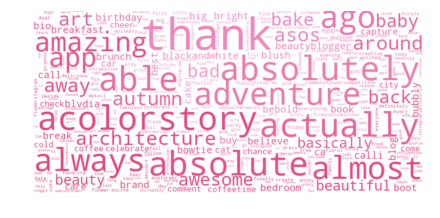

In [21]:
#Creating the WordCloud

from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

d = pathname
## join all documents in corpus
text = " ".join(names_texts)
## image from PublicDomainPictures.net
## http://www.publicdomainpictures.net/view-image.php?image=232185&picture=family-gathering
mask = np.array(Image.open(path.join(d, "pink_mix2.png")))
wc = WordCloud(background_color="white", max_words=356, mask=mask,
               max_font_size=90, random_state=42, width=800, height=400)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
wc.to_file("word_cloud.png")
plt.axis("off")
_=plt.show()

In [22]:
print(type(nmf.components_))
print(len(nmf.components_))
print(nmf.components_)
text_components = nmf.components_

<class 'numpy.ndarray'>
8
[[0.00951134 0.02369158 0.03477067 ... 0.01829685 0.         0.00064182]
 [0.00277499 0.03860846 0.07277039 ... 0.18305517 0.097507   0.00359102]
 [0.         0.00525289 0.         ... 0.         0.0080065  0.15856611]
 ...
 [0.03608316 0.         0.08353833 ... 0.         0.         0.00069696]
 [0.02913909 0.         0.         ... 0.         0.04117957 0.        ]
 [0.         0.         0.04256404 ... 0.02869272 0.         0.01527514]]


In [23]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [24]:
print("\nTopics for texts in NMF model:")
print_top_words(nmf, names_texts, n_top_words)


Topics for texts in NMF model:
Topic #0:
fashion style blog lookoftheday friday
Topic #1:
home liveauthentic dog day adventure
Topic #2:
food instagood home dessert pie
Topic #3:
nan pie thanksgiving pumpkin fall
Topic #4:
matt game nintendo epilepsy story
Topic #5:
kc explorekc blvdia weekend flower
Topic #6:
coffee breakfast coffeetime need milk
Topic #7:
style outfit shop fashionger kcfw



In [25]:
import math

#define a function for cosine similarity - the latest version in sklearn doesn't take vectors
def cosine_similarity(a, b):
    return sum([i*j for i,j in zip(a, b)])/(math.sqrt(sum([i*i for i in a]))* math.sqrt(sum([i*i for i in b])))

In [26]:
def topic_sim(arr, feature_names, n_top_words, topics):
    """
    @type  arr: array of number
    @param arr: vectorizer number in an array.
    @type  feature_names: array of string
    @param feature_names: The array of feature names.
    @type  n_top_words: number
    @param n_top_words: The number of topics to return.
    @type  topics: array of string
    @param topics: Complete list of topics from topic extraction.
    
    @rtype:   top topics
    @return:  top topics in string separated by space.
    """
    top_sim = 0
    top_topic = np.array([])
    # iterate over topics
    for idx, topic in enumerate(topics):
        # calculate cosine similarity - substitute euclidean distance if that is your preferred metric
        # could switch to euclidean_distances
        sim = cosine_similarity(arr, topic)
        if sim > top_sim:
            top_sim = sim
            top_topic = topic
    
    # argsort sort is in ascending order, so pick last n_top_words from it
    selected_topic_index = top_topic.argsort()[:-n_top_words-1:-1]
    # return the text feature names by indeing back into feature_names (assigned earlier)   
    return " ".join([feature_names[i] for i in selected_topic_index])


In [27]:
#apply most similar topic to each document
instagramdf['topics'] = np.ma.apply_along_axis(topic_sim, axis=1, 
        arr=v3_tfidf.toarray(), feature_names=names_texts, n_top_words=5, topics=text_components)

In [29]:
instagramdf['topics'].value_counts()

home liveauthentic dog day adventure      69
fashion style blog lookoftheday friday    47
style outfit shop fashionger kcfw         42
kc explorekc blvdia weekend flower        37
food instagood home dessert pie           31
matt game nintendo epilepsy story         12
coffee breakfast coffeetime need milk     11
nan pie thanksgiving pumpkin fall          6
Name: topics, dtype: int64

In [31]:
instagramdf[['newtext','topics']].head(5)

,newtext,topics
index,,
0,First vacation since our honeymoon 3 years ago! See you soon Colorado! #austenanniversaryadventure#austenadventures #vacation #anniversary#kctoco #colorado #bye,home liveauthentic dog day adventure
1,Great Sand Dunes National Park . . . . . #kctoco #austenanniversaryadventure #greatsanddunes #colorado #vacation #bebold #sand #mountains #snowcapped,style outfit shop fashionger kcfw
2,Thanks @taydaliese for taking such amazing photos and to @iheartazazie for featuring them on azazie.com! I can't even believe it! #azazie #iheartazazie #taydaliesephoto #kansascity #kc #bridesmaids #bridesmaiddress #blue #moody #drama #lookoftheday #website #feature #bebold #updo #bun #vampy #libertymemorial #gown #formal #fancy #formaldress,kc explorekc blvdia weekend flower
3,"(Link to the article in my bio) Nintendo has always been a link that tied my husband, Corey, and his brother, Matt, together almost as much as the fact that they were brothers. After Matt passed away in May, we realized that Corey would still be able to “play” with Matt’s Nintendo characters through these little things called amiibos. Basically, they capture game data and create a ghost of sorts that can be summoned and used to interact with in a variety of games. We wanted to share this amazing story with a source that could potentially get it back to Nintendo and just found out the story got published on a website called Zelda Informer which is a hub of information for fans of Nintendo and The Legend of Zelda specifically. Huge thank you to @taydaliese for taking some beautiful pictures of the game room and of Matt's things to go with the story. http://taydaliese.pixieset.com/guestlogin/matt/ Please share this amazing story so that everyone can hear about the amazing way we still get to interact with an essence of Matt's being and to learn more about how Corey will get to play a new game with his brother even though he's not with us anymore. ️ #gamer #nintendo #legendofzelda #zelda #link #breathofthewild #twilightprincess #wolflink #wolflinkamiibo #wii #wiiu #brothers #rip",matt game nintendo epilepsy story
4,"(Link to the article in my bio) Nintendo has always been a link that tied my husband, Corey, and his brother, Matt, together almost as much as the fact that they were brothers. After Matt passed away in May, we realized that Corey would still be able to “play” with Matt’s Nintendo characters through these little things called amiibos. Basically, they capture game data and create a ghost of sorts that can be summoned and used to interact with in a variety of games. We wanted to share this amazing story with a source that could potentially get it back to Nintendo and just found out the story got published on a website called Zelda Informer which is a hub of information for fans of Nintendo and The Legend of Zelda specifically. Huge thank you to @taydaliese for taking some beautiful pictures of the game room and of Matt's things to go with the story. http://taydaliese.pixieset.com/guestlogin/matt/ Please share this amazing story so that everyone can hear about the amazing way we still get to interact with an essence of Matt's being and to learn more about how Corey will get to play a new game with his brother even though he's not with us anymore. ️ #gamer #nintendo #legendofzelda #zelda #link #breathofthewild #twilightprincess #wolflink #wolflinkamiibo #wii #wiiu #brothers #rip",matt game nintendo epilepsy story


## The Predictive Models

In [32]:
instagramdf['greatpost'] = np.where(instagramdf['likes']>=250, 'Yes', 'No')
instagramdf['greatpost'].value_counts()

No     214
Yes     41
Name: greatpost, dtype: int64

In [33]:
#Exported the csv so I can look at how many "great posts" are in each topic.
#instagramdf.to_csv('outpu.csv')

In [35]:
#Split the data
X = v3_tfidf.toarray()
y = instagramdf['greatpost'].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state is set seed

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(178, 355)
(77, 355)
(178,)
(77,)


In [37]:
#Naive Bayes model
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
print(model)
model.fit(X_train, y_train)

# make predictions
nb_expected = y_test
nb_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(nb_expected, nb_predicted)))
print(metrics.classification_report(nb_expected, nb_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8831168831168831
accuracy: 0.8831168831168831
             precision    recall  f1-score   support

         No       0.88      1.00      0.94        68
        Yes       0.00      0.00      0.00         9

avg / total       0.78      0.88      0.83        77



C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
log_expected = y_test
log_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(log_expected, log_predicted)))
print(metrics.classification_report(log_expected, log_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8831168831168831
accuracy: 0.8831168831168831
             precision    recall  f1-score   support

         No       0.88      1.00      0.94        68
        Yes       0.00      0.00      0.00         9

avg / total       0.78      0.88      0.83        77



C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
# Decision Tree with no Hashtags
#Split the data
X = v1_tfidf.toarray()
y = instagramdf['greatpost'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) #random_state is set seed

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
tree_expected1 = y_test
tree_predicted1 = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(tree_expected1, tree_predicted1)))
print(metrics.classification_report(tree_expected1, tree_predicted1))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
0.7142857142857143
accuracy: 0.7142857142857143
             precision    recall  f1-score   support

         No       0.88      0.78      0.83        68
        Yes       0.12      0.22      0.15         9

avg / total       0.79      0.71      0.75        77



In [49]:
# Decision Tree with all Hashtags
#Split the data
X = v2_tfidf.toarray()
y = instagramdf['greatpost'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43) #random_state is set seed

model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
tree_expected2 = y_test
tree_predicted2 = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(tree_expected2, tree_predicted2)))
print(metrics.classification_report(tree_expected2, tree_predicted2))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
0.6753246753246753
accuracy: 0.6753246753246753
             precision    recall  f1-score   support

         No       0.84      0.74      0.79        62
        Yes       0.27      0.40      0.32        15

avg / total       0.73      0.68      0.70        77



In [50]:
# Decision Tree w/ some hastags
#Split the data
X = v3_tfidf.toarray()
y = instagramdf['greatpost'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state is set seed

model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
tree_expected3 = y_test
tree_predicted3 = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(tree_expected3, tree_predicted3)))
print(metrics.classification_report(tree_expected3, tree_predicted3))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
0.8571428571428571
accuracy: 0.8571428571428571
             precision    recall  f1-score   support

         No       0.91      0.93      0.92        68
        Yes       0.38      0.33      0.35         9

avg / total       0.85      0.86      0.85        77



In [46]:
#create the tree
#from sklearn import tree
#dot_data = tree.export_graphviz(model, out_file=None, 
#                         feature_names=tfidf3.get_feature_names() ,  
#                         class_names=instagramdf.greatpost.unique() ,  
#                         filled=True, rounded=True,  
#                         special_characters=True)  

In [57]:
#import graphviz 
#graph = graphviz.Source(dot_data)  # creates the graph
#graph

In [47]:
#Export image of the decision Tree

#import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#from sklearn.externals.six import StringIO  
#import pydotplus 
#dot_data = StringIO() 
#tree.export_graphviz(model, feature_names=tfidf.get_feature_names(), class_names=instagramdf.greatpost.unique(), filled=True, out_file=dot_data)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("tree.pdf") 

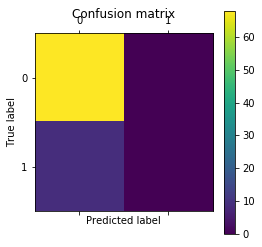

[[68  0]
 [ 9  0]]


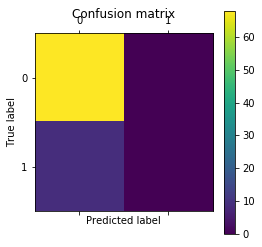

[[68  0]
 [ 9  0]]


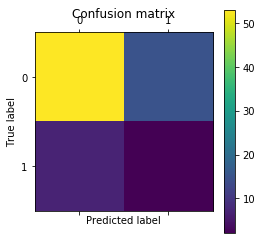

[[53 15]
 [ 7  2]]


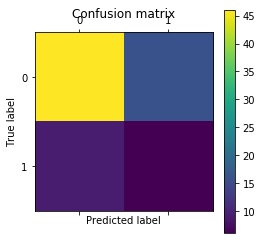

[[46 16]
 [ 9  6]]


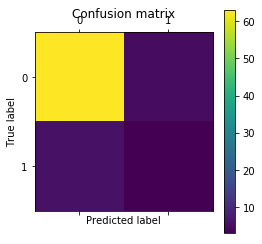

[[63  5]
 [ 6  3]]


In [51]:
# display confusion matrix
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(nb_expected, nb_predicted)    
create_cm(log_expected, log_predicted)
create_cm(tree_expected1, tree_predicted1)   
create_cm(tree_expected2, tree_predicted2)
create_cm(tree_expected3, tree_predicted3)